In [2]:
from sklearn.preprocessing import MinMaxScaler
import torch
import numpy as np
from torch import nn
import pandas as pd
import torch.utils.data as Data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

data = pd.read_csv(r'D:\AE_VScode\Battery_RUL.csv')
scaler = MinMaxScaler()#归一化方法：MinMax
# data = scaler.fit_transform(data)#归一化
data = data.to_numpy()
data = data[:,1:]
data = scaler.fit_transform(data)
data_x = data[:,0:7]
data_y = data[:,7:8]
# print(data[0])
# print(data_x[0])
# print(data_y[0])
#反归一化
#！！！！original_data = scaler.inverse_transform(data)！！！！
data_x = data_x.astype(np.float32)
data_y = data_y.astype(np.float32)
data_x = torch.from_numpy(data_x)
data_y = torch.from_numpy(data_y)#将 numpy 数组转换为 PyTorch 张量
print(type(data_x))
# data_x = data_x.cuda()
# data_y = data_y.cuda()
torch_dataset = Data.TensorDataset(data_x,data_y)#dataset封装
len(torch_dataset)
train_dataset,test_dataset = torch.utils.data.random_split(torch_dataset, [11000, 4064])#随机划分训练集，验证集，测试集

def getloader(torch_dataset):
    loader = Data.DataLoader(#Dataloader，这里调整batch_size
        dataset=torch_dataset,  # 数据，封装进Data.TensorDataset()类的数据
        batch_size=64,  # 每块的大小
        shuffle=True,  # 要不要打乱数据
        num_workers=0,  # 多进程（multiprocess）来读数据
    )
    return loader

train_loader = getloader(train_dataset)

test_loader = getloader(test_dataset)
print(type(train_loader))


d:\Anaconda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'torch.Tensor'>
<class 'torch.utils.data.dataloader.DataLoader'>


In [3]:
class AE(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(AE, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
        
        self.predictor = nn.Sequential(
            nn.Linear(hidden_dim, output_dim),
            nn.ReLU()
        )
        
    def forward(self, x):
        h = self.encoder(x)
        x_hat = self.decoder(h)
        y_hat = self.predictor(h)
        return x_hat, y_hat,h


class sae(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.ae1 = AE(input_dim=7, output_dim=1, hidden_dim=6)       
        
        self.ae2 = AE(input_dim=6, output_dim=1, hidden_dim=5)        
        
        self.ae3 = AE(input_dim=5, output_dim=1, hidden_dim=4)
        
    def forward(self, x):
        x_hat, y_hat,h = self.ae1(x)
        x_hat2,y_hat2,h2 = self.ae2(h)
        x_hat3,y_hat3,h3 = self.ae3(h2)
        return y_hat3

PreEpoch [1/5], ae1_Loss: 0.3272
PreEpoch [1/5], ae2_Loss: 0.3540
preEpoch [1/5], ae3_Loss: 0.0763
PreEpoch [2/5], ae1_Loss: 0.3341
PreEpoch [2/5], ae2_Loss: 0.3001
preEpoch [2/5], ae3_Loss: 0.0705
PreEpoch [3/5], ae1_Loss: 0.3545
PreEpoch [3/5], ae2_Loss: 0.3640
preEpoch [3/5], ae3_Loss: 0.0839
PreEpoch [4/5], ae1_Loss: 0.3331
PreEpoch [4/5], ae2_Loss: 0.2824
preEpoch [4/5], ae3_Loss: 0.0795
PreEpoch [5/5], ae1_Loss: 0.3453
PreEpoch [5/5], ae2_Loss: 0.3512
preEpoch [5/5], ae3_Loss: 0.0843
Epoch [1/50], Loss: 0.0645
Epoch [2/50], Loss: 0.0236
Epoch [3/50], Loss: 0.0119
Epoch [4/50], Loss: 0.0158
Epoch [5/50], Loss: 0.0232
Epoch [6/50], Loss: 0.0102
Epoch [7/50], Loss: 0.0071
Epoch [8/50], Loss: 0.0070
Epoch [9/50], Loss: 0.0088
Epoch [10/50], Loss: 0.0140
Epoch [11/50], Loss: 0.0102
Epoch [12/50], Loss: 0.0084
Epoch [13/50], Loss: 0.0105
Epoch [14/50], Loss: 0.0132
Epoch [15/50], Loss: 0.0046
Epoch [16/50], Loss: 0.0086
Epoch [17/50], Loss: 0.0067
Epoch [18/50], Loss: 0.0059
Epoch [19/

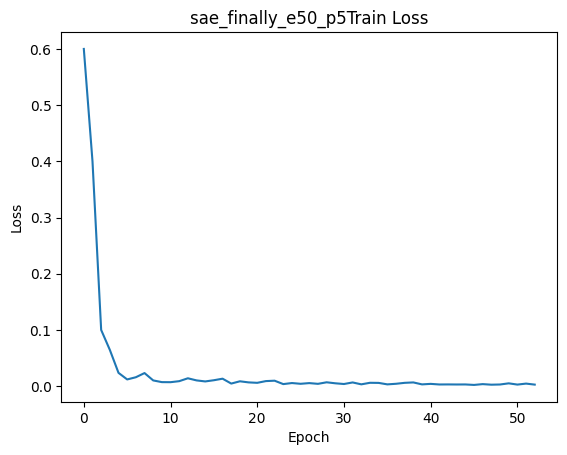

[0.6, 0.4, 0.1, 0.06449898332357407, 0.02362676151096821, 0.011906552128493786, 0.015824684873223305, 0.023243442177772522, 0.010166250169277191, 0.007127898745238781, 0.007018094416707754, 0.008830501697957516, 0.013973320834338665, 0.01018795371055603, 0.008359341882169247, 0.010497515089809895, 0.01324811577796936, 0.004563180264085531, 0.00860596913844347, 0.006658863741904497, 0.005890889558941126, 0.008965788409113884, 0.009667223319411278, 0.0036193716805428267, 0.0054969885386526585, 0.004163254518061876, 0.005389246623963118, 0.004086541477590799, 0.006824963726103306, 0.005048397928476334, 0.0037753437645733356, 0.006554443389177322, 0.0031954417936503887, 0.005936079658567905, 0.005751919467002153, 0.003130936762318015, 0.004181236494332552, 0.005869036074727774, 0.006587550975382328, 0.0031053132843226194, 0.004021722357720137, 0.0029475665651261806, 0.003039328847080469, 0.0029191712383180857, 0.002992380177602172, 0.002153856446966529, 0.003572039306163788, 0.002563396468

In [8]:
model = sae()

learning_rate = 0.001
pre_num_epochs = 5
num_epochs = 50
criterion = nn.MSELoss()

#预训练
for epoch in range(pre_num_epochs):
    optimizer = optim.Adam(model.ae1.parameters(), lr=learning_rate)
    
    for x, y in train_loader:
        optimizer.zero_grad()
        x_hat, y_hat,h = model.ae1(x)
        loss = criterion(y_hat,y)
        
        loss.backward()
        optimizer.step()
        
    print("PreEpoch [{}/{}], ae1_Loss: {:.4f}".format(epoch+1, pre_num_epochs, loss.item()))

    
    for param in model.ae1.parameters():
        param.requires_grad = False

    optimizer = optim.Adam(model.ae2.parameters(), lr=learning_rate)

    for x, y in train_loader:
        optimizer.zero_grad()
        x_hat, y_hat,h = model.ae1(x)
        x_hat2,y_hat2,h2= model.ae2(h)
        loss = criterion(y_hat2,y)
        
        loss.backward()
        optimizer.step()
        
    print("PreEpoch [{}/{}], ae2_Loss: {:.4f}".format(epoch+1, pre_num_epochs, loss.item()))

    for param in model.ae2.parameters():
        param.requires_grad = False

    optimizer = optim.Adam(model.ae3.parameters(), lr=learning_rate)
    
    for x, y in train_loader:
        optimizer.zero_grad()
        x_hat, y_hat,h = model.ae1(x)
        x_hat2,y_hat2,h2 = model.ae2(h)
        x_hat3,y_hat3,h3 = model.ae3(h2)
    
        loss = criterion(y_hat3,y)

        loss.backward()
        optimizer.step()
        
    print("preEpoch [{}/{}], ae3_Loss: {:.4f}".format(epoch+1, pre_num_epochs, loss.item()))
    
    for param in model.ae1.parameters():
        param.requires_grad = True
    for param in model.ae2.parameters():
        param.requires_grad = True

#微调
loss_s = [0.6,0.4,0.1,]

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            predict = model(x)
            loss = criterion(y,predict)
            loss.requires_grad_(True)
            
            loss.backward()
            optimizer.step()
        loss_s.append(loss.item())    
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, loss.item()))

plt.plot(range(len(loss_s)), loss_s)
plt.title(f'sae_finally_e{num_epochs}_p{pre_num_epochs}Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.savefig(f"sae_finally_e{num_epochs}_p{pre_num_epochs}Train Loss")
plt.show()
torch.save(model.state_dict(), f"sae_finally_e{num_epochs}_p{pre_num_epochs}.pth")
print(loss_s)


AverageRMSE: 0.061416232550982386
MaxRMSE: 0.13270717859268188
MinRMSE: 0.03983665257692337
Average R2: 0.9452264288553202
Max: 0.980370798954886
Min: 0.7579162010811278


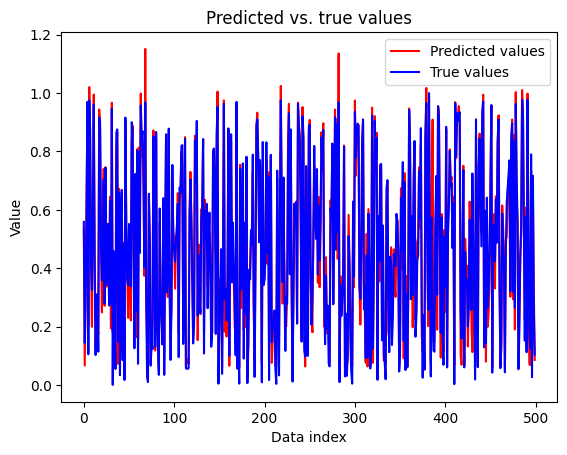

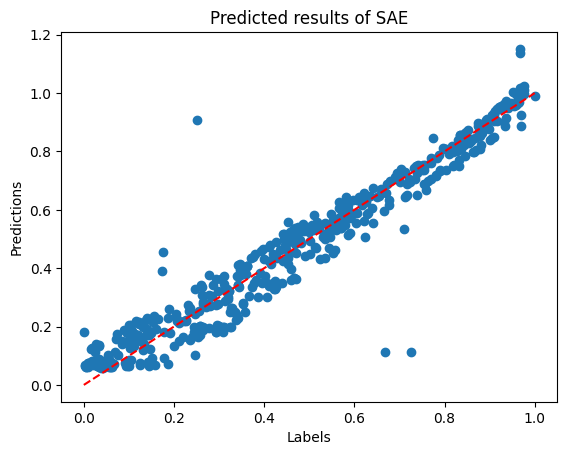

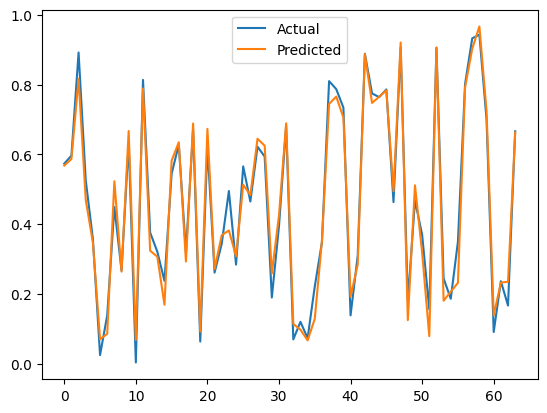

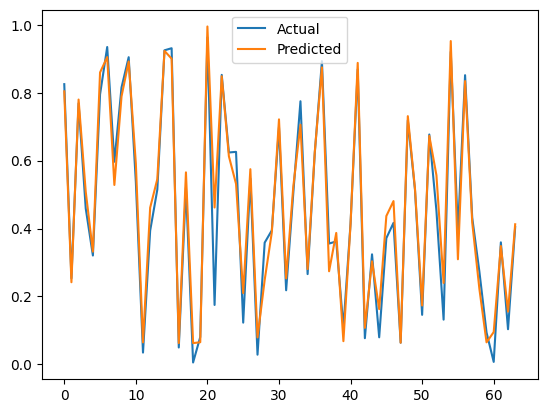

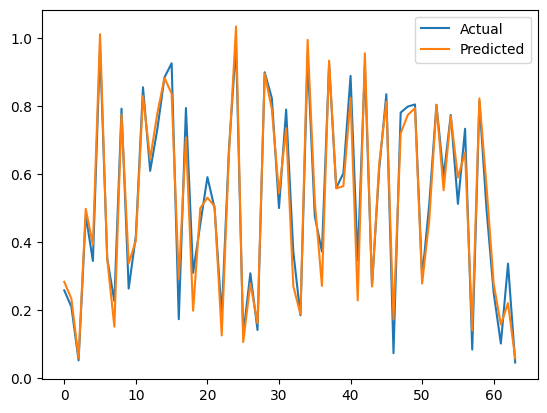

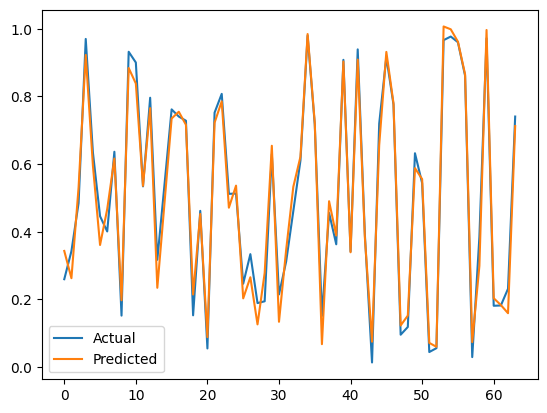

In [11]:
from sklearn.metrics import r2_score

def test_model(model, test_loader, criterion):
    model.eval()
    losses = []
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            loss = torch.sqrt(loss)
            losses.append(loss.item())
    print('AverageRMSE:',sum(losses)/len(losses))
    AverageLoss = sum(losses)/len(losses)
    print('MaxRMSE:',max(list(losses)))
    MaxLoss = max(list(losses))
    print('MinRMSE:',min(list(losses)))
    MinLoss = min(list(losses))
    # plt.plot(range(len(losses)), losses)
    # plt.title(f'sgtae_tt2_e{num_epochs}_p{pre_num_epochs}Test Loss')
    # plt.xlabel('Batch')
    # plt.ylabel('Loss')
    # plt.show()
    return AverageLoss,MaxLoss,MinLoss

def test_R22(model, test_loader):
    model.eval()
    losses = []
    predictions_list = []
    labels_list = []
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            predictions = model(inputs)
            loss = r2_score(predictions, labels)
            losses.append(loss.item())
            predictions_list.append(predictions.numpy())
            labels_list.append(labels.numpy())
    print('Average R2:', sum(losses)/len(losses))
    AverageR2 = sum(losses)/len(losses)
    print('Max:', max(list(losses)))
    MaxR2 = max(list(losses))
    print('Min:', min(list(losses)))
    MinR2 = min(list(losses))
    
    predictions_list = np.concatenate(predictions_list, axis=0)
    labels_list = np.concatenate(labels_list, axis=0)
    
    
    #45度线图
    plt.scatter(labels_list[:500], predictions_list[:500])
    plt.plot([min(labels_list), max(labels_list)], [min(labels_list), max(labels_list)], color='red', linestyle='--')  # 添加四十五度线
    plt.title('Predicted results of SAE')
    plt.xlabel('Labels')
    plt.ylabel('Predictions')
    plt.show()
    
    return AverageR2, MaxR2, MinR2

def test1(model, test_loader):
        model.eval()
        i = 0
        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data
                predicted = model(inputs)
                plt.plot(np.array(labels), label='Actual')
                plt.plot(np.array(predicted), label='Predicted')
                plt.legend()
                plt.show()
                i+=1
                if i == 4:
                    break    
criterion1 = nn.MSELoss()
    
model_test = sae()
model_test.load_state_dict(torch.load(f"sae_finally_e{num_epochs}_p{pre_num_epochs}.pth"))
AverageLoss,MaxLoss,MinLoss = test_model(model_test,test_loader,criterion1)
AverageR2,MaxR2,MinR2 = test_R22(model_test,test_loader)
test1(model_test,test_loader)